# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [106]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [107]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [108]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [109]:
fifa['ValueNumeric'] = fifa.Value
fifa['ValueNumeric'] = [float(fifa.ValueNumeric[i].strip('€MK')) for i in range(len(fifa.ValueNumeric))]

In [141]:
# Review all with the K in value, to convert to millions (/1000)

# for i in range(len(fifa.Value)):
#     if fifa.Value[i].endswith('K'):
#         fifa.ValueNumeric[i]/1000

#for i in range(len(fifa.Value)):
 #   fifa.where(fifa.Value[i].endswith('K'), fifa.ValueNumeric[i]/1000)

In [129]:
fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,Right,LF,4.0,...,88.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,93.0
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,Right,RCM,4.0,...,72.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,67.0
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,Right,RS,4.0,...,75.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,80.0
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,Right,RCB,3.0,...,75.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,51.0
9,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,Right,GK,3.0,...,60.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,68.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [90]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("fifa.ValueNumeric ~C(fifa['Preferred Foot']) + C(fifa['Position'])", data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),7.292211e+04,1.0,0.871795,3.504713e-01
C(fifa['Position']),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [91]:
# Your conclusions here:

# H0: ValueNumeric_m = Position_m = Preferred_Foot_m
# H0: ValueNumeric_m != | = Position_m = | != Preferred_Foot_m

# The p value for both, Position and Preferred Foot is really low (smaller than 0.05), so we can reject the null 
# hypothesis and conclude that preffered foot and position don't have an impact on their value.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [92]:
# Your code here:
model = ols("fifa.ValueNumeric ~C(fifa['Nationality'])", data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Nationality']),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [93]:
# Pvalue is even lower, so there's defenately no impact from players nationality on their value.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [94]:
# Your code here:
print(fifa.shape)
fifa.isnull().sum()

(18207, 21)


Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [95]:
fifa = fifa.dropna()

In [96]:
print(fifa.shape)
fifa.isnull().sum()

(17918, 21)


Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [99]:
# Your code here:
import statsmodels.api as sm

X = fifa[['Stamina','SprintSpeed']]
X = sm.add_constant(X) 
Y = fifa['ValueNumeric']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Mon, 16 Sep 2019   Prob (F-statistic):             0.0116
Time:                        20:39:03   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:

# F test of overall significance + p value : does the overall model have any predictive value ?

# Adjusted. R-squared is 0, so model is not a good fit.

# Stamina has a small p-value, so we can reject null hypothesis and say there's association between Stamina and
# player Value.
# Sprint Speed however has higher p-value, therefore we cannot reject null hypothesis; meaning that there's no
# association between Sprint Speed and player Value.

# Sprint Speed is positively associated with player Value; Stamina is negatively associated with player Value.

In [ ]:
# The value of Prob(F) is the probability that the null hypothesis for the full model is true 
# (i.e., that all of the regression coefficients are zero).

# Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a 
# higher value generally indicates a better fit, assuming certain conditions are met. 

# Coef of each variable represents the change in the output Y due to a change of one unit in the x 
# variable (everything else held constant)

# Std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of 
# accuracy.

# P >|t| is the p-value. A p-value of less than 0.05 is considered to be statistically significant.

# Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [100]:
# Your code here:

X = fifa['Potential']
X = sm.add_constant(X) 
Y = fifa['ValueNumeric']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):          9.15e-225
Time:                        20:40:54   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

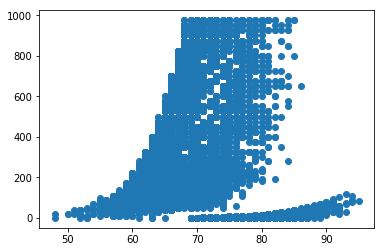

In [104]:
# Your code here:
%matplotlib inline
import matplotlib.pyplot as plt

x = fifa.Potential
y = fifa.ValueNumeric
plt.scatter(x,y)